In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-illness/data-table.csv
/kaggle/input/iq-by-state/average-iq-by-state-updated-june-2023.csv


In [2]:
usabb = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [3]:
#This dictionary was used to prepare data for a merge

In [4]:


iq = pd.read_csv('/kaggle/input/iq-by-state/average-iq-by-state-updated-june-2023.csv')
suic = pd.read_csv('/kaggle/input/mental-illness/data-table.csv')
iq.head(4)
suic.head(4)

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,15.8,827,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,30.8,220,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,19.5,1475,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,20.6,618,/nchs/pressroom/states/arkansas/ar.htm


In [5]:
iq1= iq.replace({'state': usabb})
iq1.head(4)



,state,averageIQScore
0,NH,103.2
1,MA,103.1
2,MN,102.9
3,VT,102.2


In [6]:
suic1 = suic[suic['YEAR']==2020]
suic1.head(4)
suic1.rename(columns = {'STATE': 'state'},inplace = True)
suic1.head(3)

/tmp/ipykernel_32/3475638151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suic1.rename(columns = {'STATE': 'state'},inplace = True)


,YEAR,state,RATE,DEATHS,URL
50,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm
51,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm
52,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm


In [7]:
suic1.head()

,YEAR,state,RATE,DEATHS,URL
50,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm
51,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm
52,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm
53,2020,AR,19.0,583,/nchs/pressroom/states/arkansas/ar.htm
54,2020,CA,10.0,4144,/nchs/pressroom/states/california/ca.htm


In [8]:
iq1.head()

,state,averageIQScore
0,NH,103.2
1,MA,103.1
2,MN,102.9
3,VT,102.2
4,ND,101.7


In [9]:
new = pd.merge( left = suic1,
        right = iq1,
        on = 'state',
        how = 'inner')
new.head(5)
       

,YEAR,state,RATE,DEATHS,URL,averageIQScore
0,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm,96.4
1,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm,99.4
2,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm,98.3
3,2020,AR,19.0,583,/nchs/pressroom/states/arkansas/ar.htm,97.1
4,2020,CA,10.0,4144,/nchs/pressroom/states/california/ca.htm,97.1


In [10]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


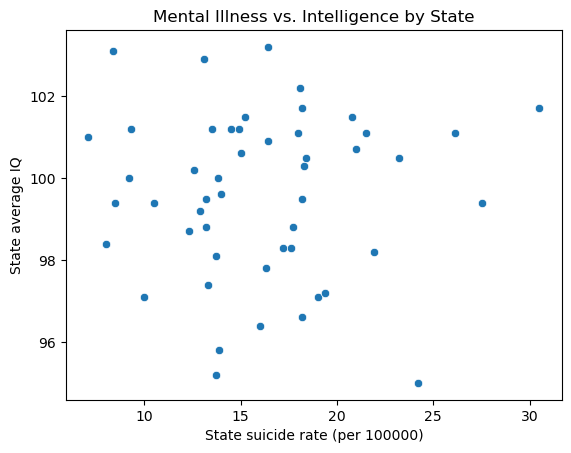

In [11]:
fig = sns.scatterplot(
    x= new['RATE'],
    y = new['averageIQScore'],
  
)
fig.set_xlabel("State suicide rate (per 100000)")
fig.set_ylabel("State average IQ")
fig.set_title("Mental Illness vs. Intelligence by State")
fig.set_label("Mental illnes as categorized by suicide rate; intelligence as categorized by IQ")

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
form = 'RATE ~ averageIQScore'
OLS = ols(formula = form, data = new)
model = OLS.fit()
final = model.summary()
final


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RATE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.002504
Date:                Wed, 30 Aug 2023   Prob (F-statistic):              0.960
Time:                        04:21:55   Log-Likelihood:                -151.50
No. Observations:                  50   AIC:                             307.0
Df Residuals:                      48   BIC:                             310.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.2606     36.325      0.393      0.696     -58.776      87.297
averageIQScore     0.0182      0.365      0.050      0.960      -0.715       0.751
==============================================================================
Omnibus:                        3.981   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.010
Skew:                           0.574   Prob(JB):                        0.222
Kurtosis:                       3.357   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The nonlinear relationship shown on the scatterplot, in combination with the near-zero r-squared value of the regression, displays a lack of a relationship between mental illness and intelligence on the state-wide level.